# Исследование причины плохой окупаемости развлекательного приложения Procrastinate Pro+. <a class="tocSkip"> 

 

## Описание проекта. <a class="tocSkip"> 

Мы исследуем расходы на маркетинг развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нужно разобраться в причинах этой ситуации.

В нашем распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Необходимо изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.
    
###### Цель исследования : <a class="tocSkip"> 
Выявить причины убытков бизнеса в последние несколько месяцев. 

###### Ход исследования: <a class="tocSkip"> 

Данные -в файлах:
    
 -   /datasets/visits_info_short.csv
 -   /datasets/orders_info_short.csv
 -   /datasets/costs_info_short.csv

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в несколько этапов:
    
    
 1. Обзор данных.


 2. Предобработка данных.


 3. Исследовательский анализ данных. 
 
 - Анализ посетителей в разрезе стран
 - Анализ устройств, которыми пользуются посетители
 - Анализ рекламных каналов для привлечения пользователей

4.  Маркетинг
 
 - Расчет раходов на маркетинг в разрезе источников 
 - Стоимость привлечения одного покупателя из каждого источника
    
5. Оценка окупаемости рекламы для привлечения пользователей с помощью LTV и ROI:

 - Общая окупаемость рекламы;
 - Окупаемость рекламы с разбивкой по устройствам;
 - Окупаемость рекламы с разбивкой по странам;
 - Окупаемость рекламы с разбивкой по рекламным каналам.


## Обзор данных

Загрузим данные о визитах, заказах и расходах в переменные.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)


In [2]:
#открываем и сохраняем как датафрейм файл с данными:
try:
    # personal path
    visits, orders, costs = (
                            pd.read_csv('visits_info_short.csv'),
                            pd.read_csv('orders_info_short.csv'),
                            pd.read_csv('costs_info_short.csv')
                            )
except:
    # Yandex path
    visits, orders, costs = (
                            pd.read_csv('/datasets/visits_info_short.csv'),
                            pd.read_csv('/datasets/orders_info_short.csv'),
                            pd.read_csv('/datasets/costs_info_short.csv')
                            )

Для удобства зададим несколько функций:

In [3]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', len(df_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())


Рассмотрим подробнее содержимое файлов:

### Таблица visits

In [4]:
df_info(visits)

Количество строк файла: 309901

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
User Id,"[981449118918, 278965908054, 590706206550, 326...",int64,150008
Region,"[United States, UK, France, Germany]",object,4
Device,"[iPhone, Mac, Android, PC]",object,4
Channel,"[organic, TipTop, RocketSuperAds, YRabbit, Fac...",object,11
Session Start,"[2019-05-01 02:36:01, 2019-05-01 04:46:31, 201...",object,306813
Session End,"[2019-05-01 02:45:01, 2019-05-01 04:47:35, 201...",object,306793



Информация о пропусках данных:


,column_name,num_missing,percent_missing
User Id,User Id,0,0.0
Region,Region,0,0.0
Device,Device,0,0.0
Channel,Channel,0,0.0
Session Start,Session Start,0,0.0
Session End,Session End,0,0.0



Первые пять строк таблицы:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


**Вывод:**

В файле - лог сервера с информацией о посещениях сайта.

Таблица содержит 309901 строк, пропуски отсутствуют.

**Содержание данных:**

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя
    
**Необходимые изменения:**
- привести к формату даты столбец Session Start	и Session End

### Таблица orders

In [5]:
df_info(orders)

Количество строк файла: 40212

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
User Id,"[188246423999, 174361394180, 529610067795, 319...",int64,8881
Revenue,"[4.99, 5.99, 9.99, 49.99, 19.99]",float64,5
Event Dt,"[2019-05-01 23:09:52, 2019-05-01 12:24:04, 201...",object,40163



Информация о пропусках данных:


,column_name,num_missing,percent_missing
User Id,User Id,0,0.0
Event Dt,Event Dt,0,0.0
Revenue,Revenue,0,0.0



Первые пять строк таблицы:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


**Вывод:**

В файле - информация о заказах с сайта.

Таблица содержит 40212 строк, пропуски отсутствуют.

**Содержание данных:**

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка
    
**Необходимые изменения:**
- привести к формату даты столбец Event Dt	

### Таблица costs

In [6]:
df_info(costs)

Количество строк файла: 1800

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
costs,"[113.3, 78.10000000000001, 85.80000000000001, ...",float64,608
dt,"[2019-05-01, 2019-05-02, 2019-05-03, 2019-05-0...",object,180
Channel,"[FaceBoom, MediaTornado, RocketSuperAds, TipTo...",object,10



Информация о пропусках данных:


,column_name,num_missing,percent_missing
dt,dt,0,0.0
Channel,Channel,0,0.0
costs,costs,0,0.0



Первые пять строк таблицы:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Вывод:**

В файле - информация о затратах на маркетинг.

Таблица содержит 1800 строк, пропуски отсутствуют.

**Содержание данных:**

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день
    
**Необходимые изменения:**
- привести к формату даты столбец dt


**Вывод по разделу 1:**

В представленных для анализа файлах - данные о визитах, заказах и расходах на маркетинг. Предварительно данных достаточно для анализа.

Необходимые изменения:
 

 - Исправим нарушения стиля (не соблюден snake case, присутствуют прописные буквы в наименованиях столбцов)

 - Устраним несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime:  
         - столбws Session Start и Session End файла visits
         - столбец Event Dt файла orders
         - столбец dt файла costs

## Предобработка данных

Приведем наименования столбцов файлов к единому стилю,  формат данных, содержащих даты,- к формату datetime, проверим наличие дубликатов.

### Нарушения стиля ( приведение названия столбцов к нижнему регистру и snacke_case)

In [7]:
#список файлов для цикла (перевод в нижний регистр):
files = [visits, orders, costs]
for name in files:
    name.columns = name.columns.str.lower()
    print(name.columns) 

Index(['user id', 'region', 'device', 'channel', 'session start',
       'session end'],
      dtype='object')
Index(['user id', 'event dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [8]:
# snacke_case:
visits = visits.rename(columns={
               'user id':'user_id', 'session start':'session_start', 
               'session end':'session_end'})

orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

### Замена формата

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # поскольку в dt у нас нет данных о времени, сразу приводим его к date

Проверим внесение изменений:

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Проверка на дубликаты

In [13]:
#проверка файлов на дубликаты:

#цикл для проверки наличия дубликатов по списку files:
for name in files:
    print(f'Количество дубликатов: {name.duplicated().sum()} штук')
        

Количество дубликатов: 0 штук
Количество дубликатов: 0 штук
Количество дубликатов: 0 штук


**Выводы по разделу 2**

В результате предобработки данных исправлены нарушения стиля в наименовании столбцов и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. Дубликаты отсутствуют. Данные готовы для анализа.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии


### Функции для расчета метрик

#### Функция для создания пользовательских профилей get_profiles

In [14]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Функция для расчета удержания get_retention

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета конверсии get_conversion

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета  LTV, ROI

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для визуализации метрик

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Визуализация удержания

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Визуализация конверсии

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Визуализация LTV и ROI

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 20))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Создадим уникальные профили пользователей, которые визуализируем в разрезе стран, устройств, а также рекламных каналов, через которые пользователи пришли в приложение.

### Создание профилей пользователей

Создадим профили пользователей, в которые добавим средний САС на одного пользователя каждой когорты. Воспользуемся для создания функцией get_profiles():

In [22]:
events=None #выведем из расчета недостающий файл с регистрацией событий
profiles = get_profiles(visits, orders, events, costs)
print('количество профилей:', len(profiles))
display(profiles.head())


количество профилей: 150008


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Мы получили 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте

Найдем минимальную и максимальную дату привлечения пользователей:


In [23]:
print('Минимальная дата привлечения пользователей', profiles['dt'].min())
print('Максимальная дата привлечения пользователей', profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


### Анализ пользователей в разрезе стран

Сгруппируем профили пользователей по региону и рассчитаем количество уникальных пользователей и количество платящих в каждом из них:

In [24]:
profiles_region = (
    profiles.groupby('region')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_region['%_region'] = round(profiles_region['user_id'] / profiles_region['user_id'].sum() *100, 2)
profiles_region['%_payers'] = round(profiles_region['payer'] / profiles_region['user_id'] *100, 2)
profiles_region.sort_values(by='payer', ascending=False)

,region,user_id,payer,%_region,%_payers
3,United States,100002,6902,66.66,6.90
2,UK,17575,700,11.72,3.98
0,France,17450,663,11.63,3.80
1,Germany,14981,616,9.99,4.11


Визуализируем результат:

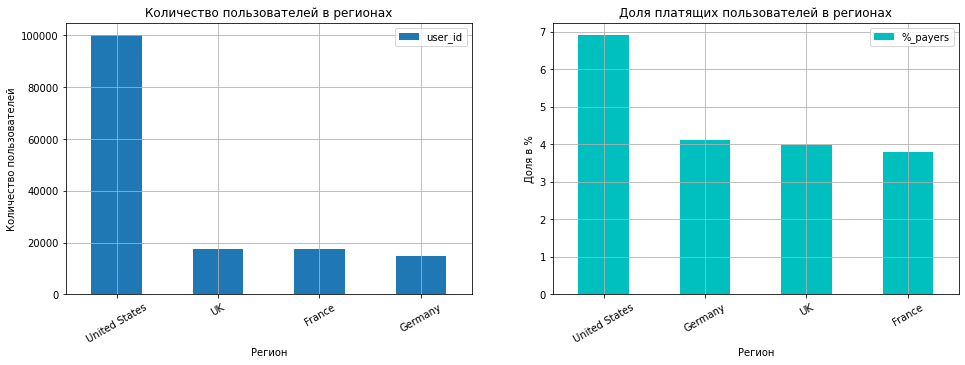

In [25]:
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
profiles_region.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='region', y=['user_id'], grid=True,
                                                           title='Количество пользователей в регионах', 
                                                           rot=30, ax=ax1).set(xlabel='Регион', 
                                                                               ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_region.sort_values(by='%_payers', ascending=False).plot.bar(
                                                             x='region', y=['%_payers'], grid=True,
                                                             title='Доля платящих пользователей в регионах',
                                                             rot=30, color='c',ax=ax2).set(xlabel='Регион', 
                                                                                           ylabel='Доля в %')

plt.show()


***Вывод:***

Наибольшее число пользователей приложения - из США (66%), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей в общем количестве также выше в США: почти 7% против 4%(+/-) в остальных странах.

### Анализ устройств пользователей

Посмотрим с каких устройств пользователи заходят в приложение. Для этого сгруппируем профили по устройствам и подсчитаем общее количество пользователей и количество перешедших в категорию платящих:

In [26]:
profiles_device = (
    profiles.groupby('device')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_device['%_payers'] = round(profiles_device['payer'] / profiles_device['user_id'] * 100, 2)
profiles_device.sort_values(by='payer', ascending=False)

,device,user_id,payer,%_payers
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
1,Mac,30042,1912,6.36
2,PC,30455,1537,5.05


Визуализируем результат:

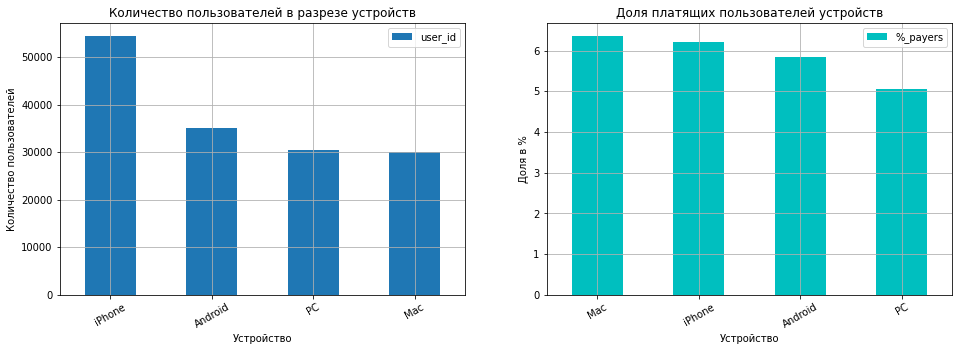

In [27]:
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
profiles_device.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='device', y=['user_id'], grid=True,
                                                           title='Количество пользователей в разрезе устройств', 
                                                           rot=30, ax=ax1).set(xlabel='Устройство', 
                                                                               ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_device.sort_values(by='%_payers', ascending=False).plot.bar(
                                                             x='device', y=['%_payers'], grid=True,
                                                             title='Доля платящих пользователей устройств',
                                                             rot=30,color='c', ax=ax2).set(xlabel='Устройство', 
                                                                                           ylabel='Доля в %')

plt.show()


***Вывод***

Больше всего пользователей заходят в приложение с iPhone (около 6 тыс.пользователей) против 3-5 тыс. пользователей других устройств, доля платящих находится на уровне 5-6.2% и максимальна у пользователей Mac.

### Анализ рекламных каналов привлечения пользователей

Посмотрим из каких рекламных источников приходят в приложение пользователи: сгруппируем профили по рекламному источнику, найдем общее количество и количество платящих пользователей каждого канала.

In [28]:
profiles_channel = (
    profiles.groupby('channel')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
# % пользователей каждого канала 
profiles_channel['%_users'] = round(profiles_channel['user_id'] / profiles_channel['user_id'].sum() * 100, 2)
# % платящих внутри канала
profiles_channel['%_payers'] = round(profiles_channel['payer'] / profiles_channel['user_id'] * 100, 2)

profiles_channel.sort_values(by='user_id', ascending=False)

,channel,user_id,payer,%_users,%_payers
10,organic,56439,1160,37.62,2.06
1,FaceBoom,29144,3557,19.43,12.20
6,TipTop,19561,1878,13.04,9.60
4,OppleCreativeMedia,8605,233,5.74,2.71
2,LeapBob,8553,262,5.70,3.06
7,WahooNetBanner,8553,453,5.70,5.30
5,RocketSuperAds,4448,352,2.97,7.91
3,MediaTornado,4364,156,2.91,3.57
8,YRabbit,4312,165,2.87,3.83
0,AdNonSense,3880,440,2.59,11.34


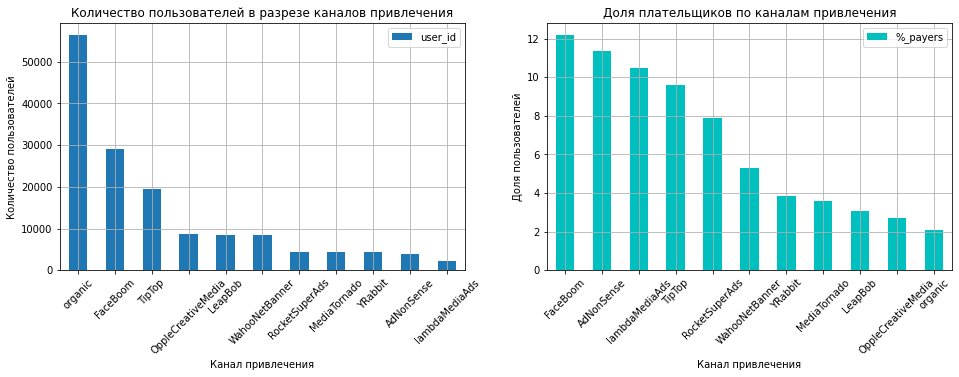

In [29]:
plt.figure(figsize=(16, 10))

ax1 = plt.subplot(2, 2, 1)
profiles_channel.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='channel', y=['user_id'],grid=True,
                                                           title='Количество пользователей в разрезе каналов привлечения', 
                                                           rot=45, ax=ax1).set(xlabel='Канал привлечения', 
                                                                               ylabel='Количество пользователей')
ax2 = plt.subplot(2, 2, 2)
profiles_channel.sort_values(by='%_payers', ascending=False).plot.bar(
                                                             x='channel', y=['%_payers'], grid=True,
                                                             title='Доля плательщиков по каналам привлечения',
                                                             rot=45, color='c', ax=ax2).set(xlabel='Канал привлечения', 
                                                                               ylabel='Доля пользователей')

plt.show()

56 тыс.пользователей находит приложение самостоятельно (канал "organic"), но доля платящих среди такиих пользователей- самая низкая (около 2%). Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По доле пользователей, перешедших в категорию платящих, лидируют также FaceBoom (12.2%) и TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%)

***Вывод:***


В среднем на привлечение одного клиента по проекту расходуется около 70 центов, если исключить из этой массы долю "organic" и оставить только платные источники- 1.13 долл.

Наибольшее количество пользователей находят приложение сами (пользователи 'organic'), на их привлечение не требуются дополнительные расходы, но доля переходящих в категорию платящих - всего 2%.

Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По доле платящих пользователей лидируют также FaceBoom (12.2%), TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%).

**Вывод по разделу 4:**

В нашем распоряжении 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте, за период привлечения с мая по октябрь 2019 г. включительно.

Наибольшее число пользователей приложения - из США (66%), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей в общем количестве также выше в США: почти 7% против 4%(+/-) в остальных странах.

Больше всего пользователей заходят в приложение с iPhone (около 6 тыс.пользователей) против 3-5 тыс. пользователей других устройств, доля платящих находится на уровне 5-6.2% и максимальна у пользователей Mac.

В среднем на привлечение одного клиента в целом по проекту расходуется около 70 центов, а если исключить из этой массы долю "organic" и оставить только платные источники- 1.13 долл.на пользователя.

Наибольшее количество пользователей находят приложение сами (пользователи 'organic'), на их привлечение не требуются дополнительные расходы, но доля переходящих в категорию платящих - всего 2%.

Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По доле пользователей, перешедших в категорию платящих, лидируют FaceBoom (12.2%), TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%).


##  Расходы на маркетинг


Для того, чтобы понять причины убытков компании, рассмотрим подробнее окупаемость рекламных каналов. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi(), проанализируем показатели конверсии и окупаемости.

### Анализ затрат на каждый источник 

**Общая сумма расходов на маркетинг:**

In [30]:
print('Общая сумма расходов на рекламу:',int(costs['costs'].sum()))

Общая сумма расходов на рекламу: 105497


**Распределение суммы расходов на рекламу по источникам:**

In [31]:
profiles_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
profiles_costs['%'] =round((profiles_costs['costs'] / profiles_costs['costs'].sum())*100, 2)
profiles_costs

,costs,%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


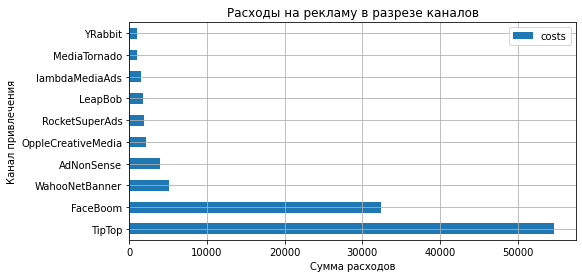

In [32]:
profiles_costs.plot.barh(y='costs',
                    grid=True,title='Расходы на рекламу в разрезе каналов',
                     figsize=(8,4)).set(ylabel='Канал привлечения', 
                     xlabel='Сумма расходов'
                      );

Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл. Основная доля расходов направлена на рекламный каналы TipTop (51.9%) и FaceBoom (30.75%).

**Динамика расходов в разрезе каналов привлечения:**

In [33]:
#сводная таблица с группировкой по каналам привлечения
pivot_channel = costs.reset_index().pivot_table(
                    index='dt', columns = 'channel', 
                    values = 'costs', aggfunc = 'sum')
pivot_channel.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,34.65,78.1,2.94,5.04,4.25,16.965,55.0,7.2,9.9,16.8
2019-05-03,47.25,85.8,2.73,6.96,5.75,16.380,64.0,8.4,9.0,16.8
2019-05-04,51.45,136.4,3.99,9.36,4.25,17.550,70.0,10.8,15.6,17.6
2019-05-05,36.75,122.1,4.62,11.04,5.50,27.495,78.0,12.0,9.6,12.8


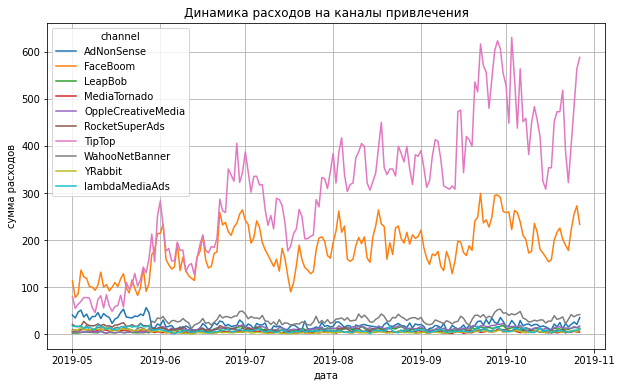

In [34]:
#график динамики расходов
pivot_channel.plot(
                  grid=True, figsize=(10, 6), title = 'Динамика расходов на каналы привлечения').set(
                  xlabel = 'дата', ylabel = 'сумма расходов');

В динамике можно увидеть рост направленных на эти же каналы (TipTop и FaceBoom) инвестиций в течение всего исследуемого периода, тогда как остальные каналы привлечения остаются постоянными, а уровень их гораздо ниже.

***Вывод:***
    
  Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл. Основная доля расходов направлена на рекламный каналы TipTop (51.9%) и FaceBoom (30.75%).
  
  В динамике можно увидеть рост направленных на эти же каналы (TipTop и FaceBoom) инвестиций в течение всего исследуемого периода, тогда как остальные каналы привлечения остаются постоянными, а уровень их гораздо ниже.

### Средняя стоимость привлечения одного покупателя 

Рассчитаем среднюю стоимость привлечения пользователя по проекту и на каждом канале. Для этого сгруппируем данные по столбцу acquisition_cost в профиле клиента.

**Расчет среднего САС на одного пользователя**

Исключим из расчета пользователей organic и посчитаем среднее по всем каналам:

In [35]:
print('Средний САС по всем пользователям платных каналов:', round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2))

Средний САС по всем пользователям платных каналов: 1.13


**Расчет среднего САС на одного пользователя каждого канала:**

In [36]:
#группируем данные профилей клиентов по каналам привлечения и считаем среднее САС по каждому каналу
mean_cost_of_channel = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)
mean_cost_of_channel

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

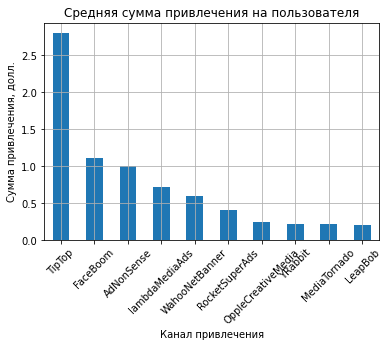

In [37]:
mean_cost_of_channel.plot.bar(
                         grid=True, rot=45, title='Средняя сумма привлечения на пользователя').set(
                         xlabel="Канал привлечения", ylabel='Сумма привлечения, долл.');

Самые дорогие каналы привлечения (стоимость выше средней) -TipTop (2.8 долл.), FaceBoom (1.11 долл.), AdNonSense (1.0 долл.).

**Вывод по разделу 5**

Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл., средняя стоимость привлечения на пользователя по всему проекту- 1.13 долл. Основная доля расходов направлена на рекламный каналы TipTop (51.9%) и FaceBoom (30.75%). В динамике также можно увидеть рост направленных на эти же каналы (TipTop и FaceBoom) инвестиций в течение всего исследуемого периода, тогда как остальные каналы привлечения остаются постоянными, а уровень их гораздо ниже.
Самые дорогие каналы привлечения - все те же TipTop (2.8 долл.), FaceBoom (1.11 долл.), а также AdNonSense (1.0 долл.).

## Оценка окупаемости рекламы для привлечения пользователей

Для выяснения причин низкой окупаемости рекламы рассчитаем LTV, ROI, а также коэффициенты конверсии и удержания пользователей.


Поскольку по условиям задачи мы смотрим данные 1-го ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, установим моментом наблюдения 01.11.2019, а горизонт анализа равным 14 дням:

In [38]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Кроме того, ограничим наши исследования пользователями, пришедшими на сайт из рекламных каналов, т.е. удалим из расчетов пользователей "organic":

In [39]:
print('Количество всех профилей пользователей:', len(profiles))
profiles = profiles.query('channel != "organic"')
print('Количество профилей пользователей без "organic":', len(profiles))

Количество всех профилей пользователей: 150008
Количество профилей пользователей без "organic": 93569


### Общая окупаемость рекламы

Для начала оценим общую ситуацию c окупаемостью рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

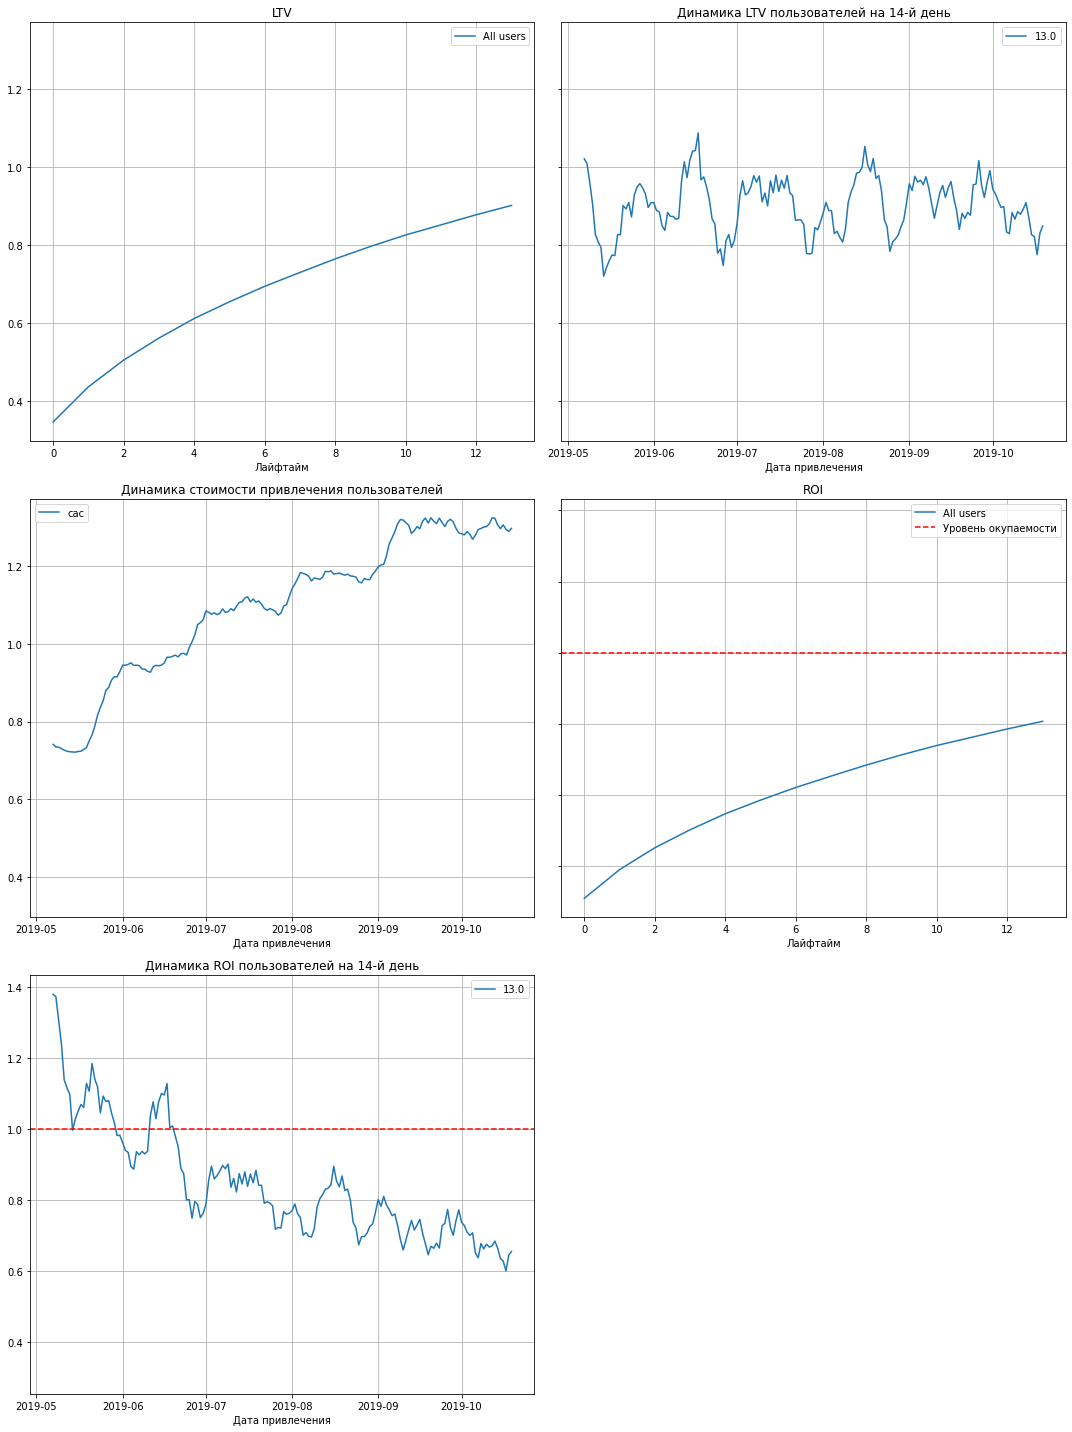

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

***Вывод:***

На общих графиках мы видим проблему- динамика LTV условно-стабильна (уровень LTV к концу второй недели привлечения примерно одинаков на всем промежутке исследуемого периода), а динамика расходов по их привлечению (САС) постоянно растет, что повлекло за собой снижение окупаемости :к августу ROI окончательно опустился ниже предельного уровня (100%). Реклама не окупается к концу второй недели и дотягивает только до уровня 80%, что идет вразрез с бизнес-планом.

### Окупаемость рекламы с разбивкой по устройствам

Чтобы определить причину снижения окупаемости, рассмотрим те же показатели в разрезе устройств, с которых пользователи выходят на сайт.

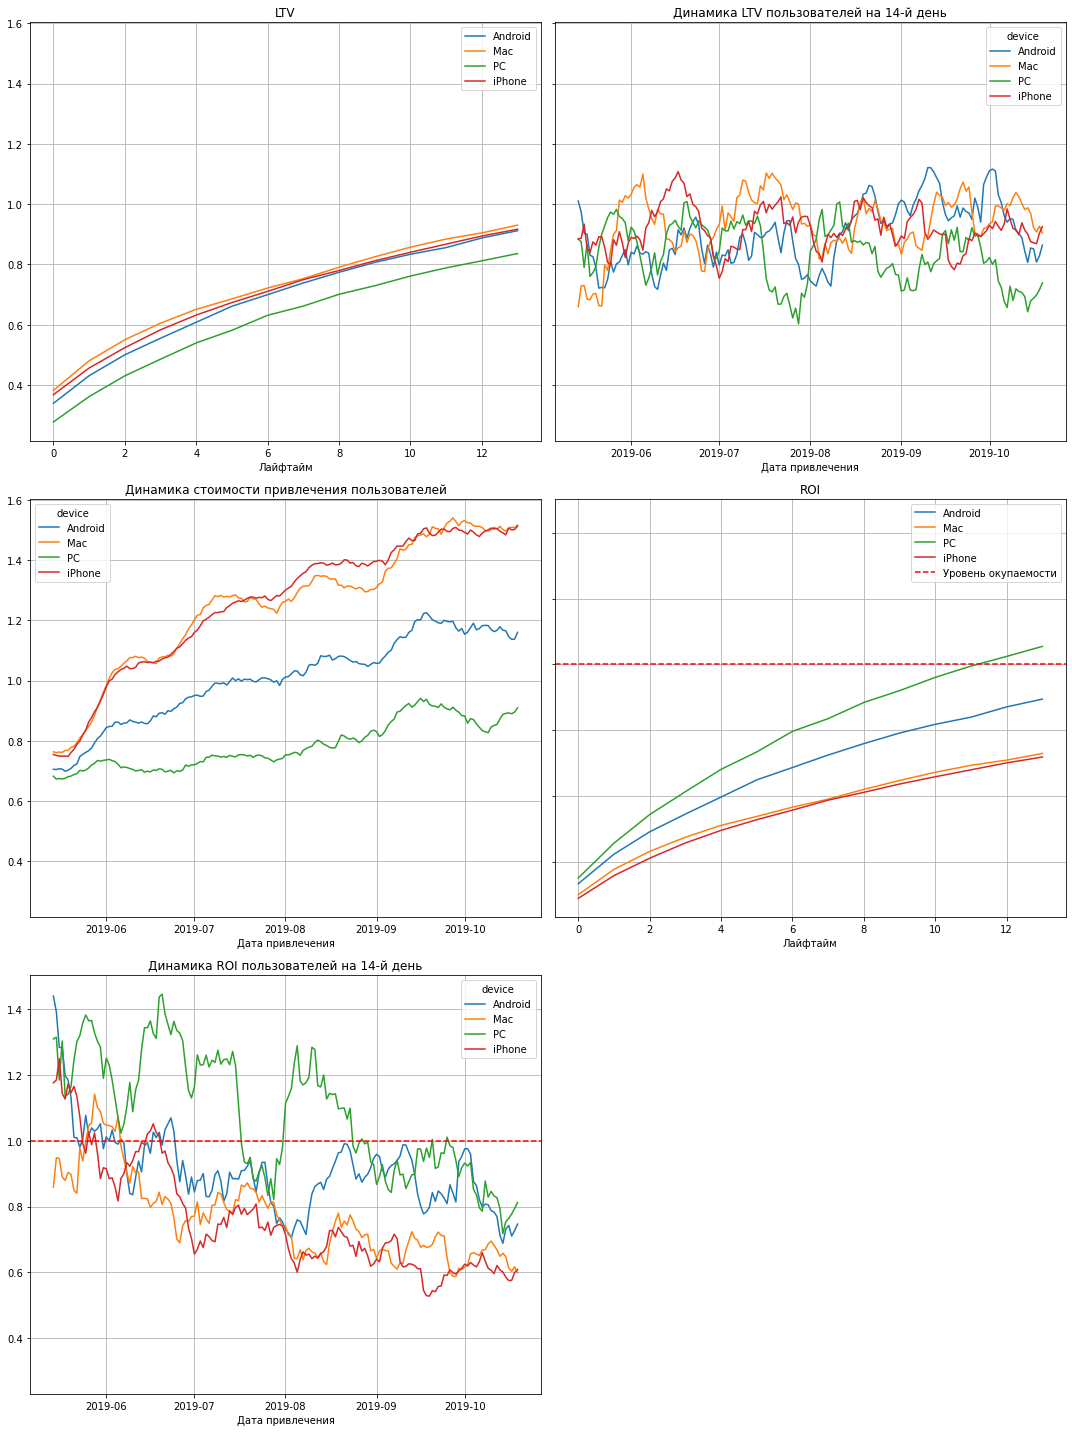

In [41]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

***Вывод:***

Стабильно не окупаются пользователи всех девайсов: порог окупаемости переходят только пользователи PC, но и то незначительно, и динамика их ROI также падает. На всех девайсах растет стоимость привлечения, самые "неокупаемые" при этом -владельцы устройств на IOS.

### Окупаемость рекламы с разбивкой по странам

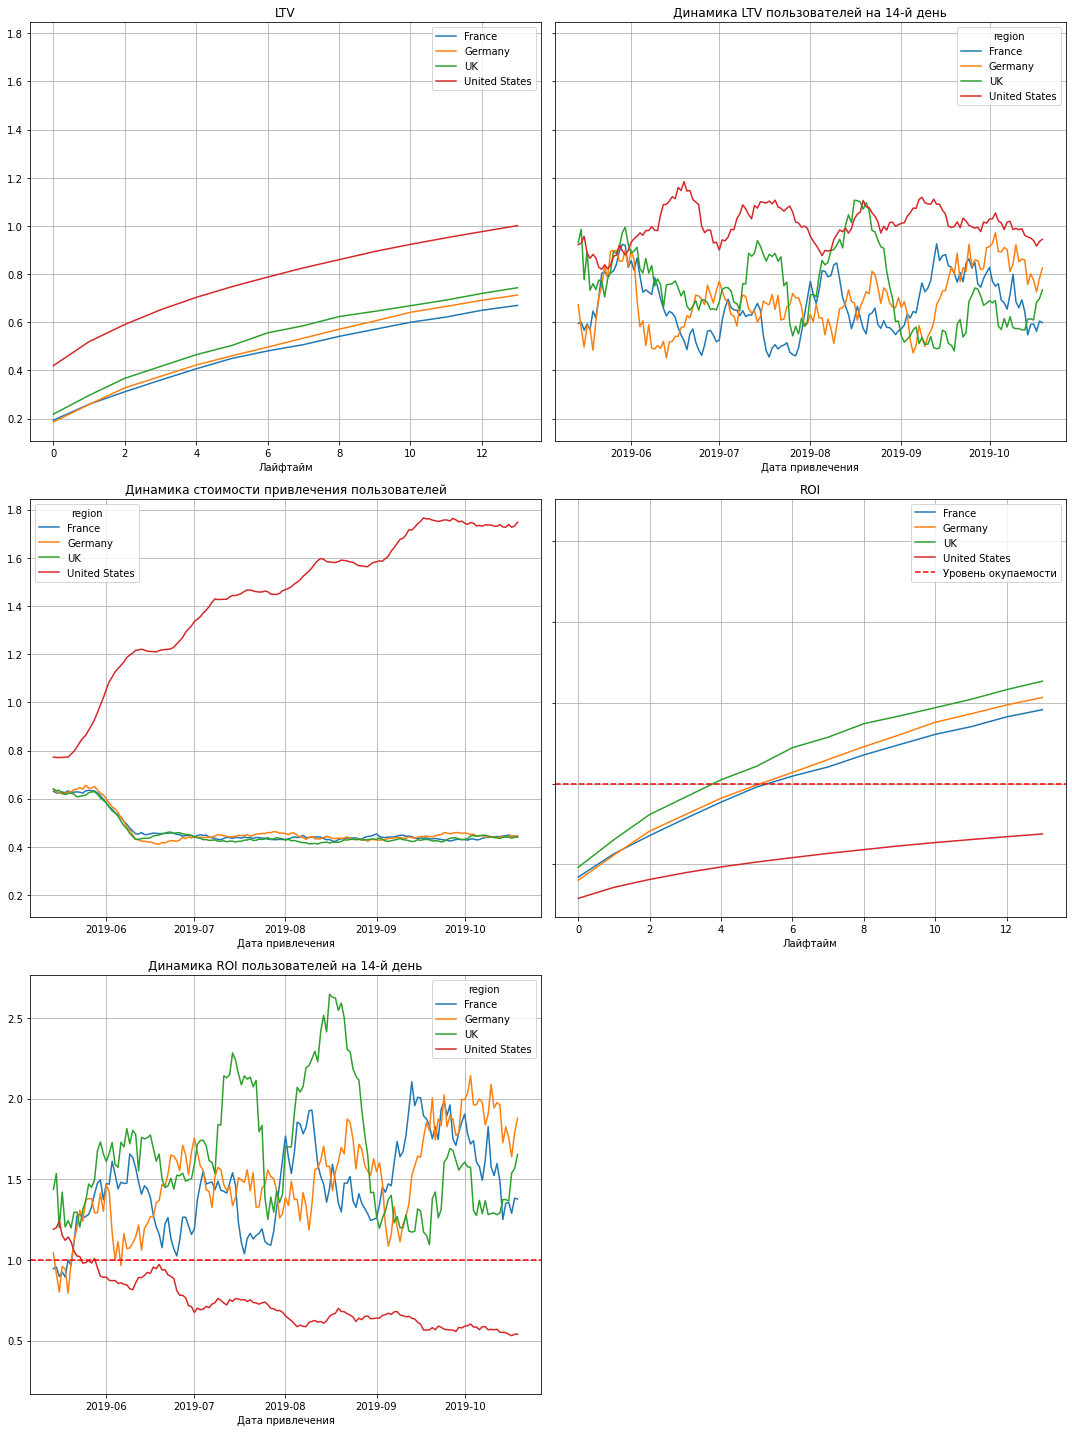

In [42]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


***Вывод***

На графиках в разрезе стран ясно видно, как из общей картины выбиваются пользователи США. 

У них наибольший по сравнению с другими странами LTV, но и наибольшие, постоянно растущие при этом расходы на рекламу: в итоге на 1 доллар выручки с пользователя расходы на его привлечение составляют около 1,75 долл. В итоге США -единственная страна, у которой уровень окупаемости ниже допустимого порога в 100% : ROI в итоге упал почти до 50%. 

С учетом того, что рынок США составляет 66% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю).

### Окупаемость рекламы с разбивкой по рекламным каналам

***Рынок США***

Поскольку проблемы с окупаемостью рекламы - только на рынке США, далее рассмотрим подробнее только рекламные каналы американского рынка.

Для понимания влияния рекламных каналов, которые используются в США, также и на рынки других стран - выясним какие каналы используются и их долю на общем страновом рынке:

In [43]:
#выделим профили пользователей США
profiles_usa = profiles.query('region == "United States"')
print(len(profiles_usa))

61829


In [44]:
#считаем количество пользователей США в разбивке по рекламным каналам
profiles_channel_usa = (
    profiles_usa.groupby('channel')['user_id']
    .count().reset_index()
)
#добавляем количество пользователей этих рекламных каналов во всех регионах
profiles_channel_usa.merge(profiles_channel[['channel', 'user_id']], on='channel').rename(
                                   columns={'user_id_x':'user_usa', 'user_id_y':'user_all'}
                                   ).sort_values(by='user_usa', ascending=False)

,channel,user_usa,user_all
0,FaceBoom,29144,29144
3,TipTop,19561,19561
2,RocketSuperAds,4448,4448
1,MediaTornado,4364,4364
4,YRabbit,4312,4312


Рекламные каналы, используемые в США, используются только в США.

Рассчитаем окупаемость рекламы на американском рынке с разбивкой по источникам привлечения:

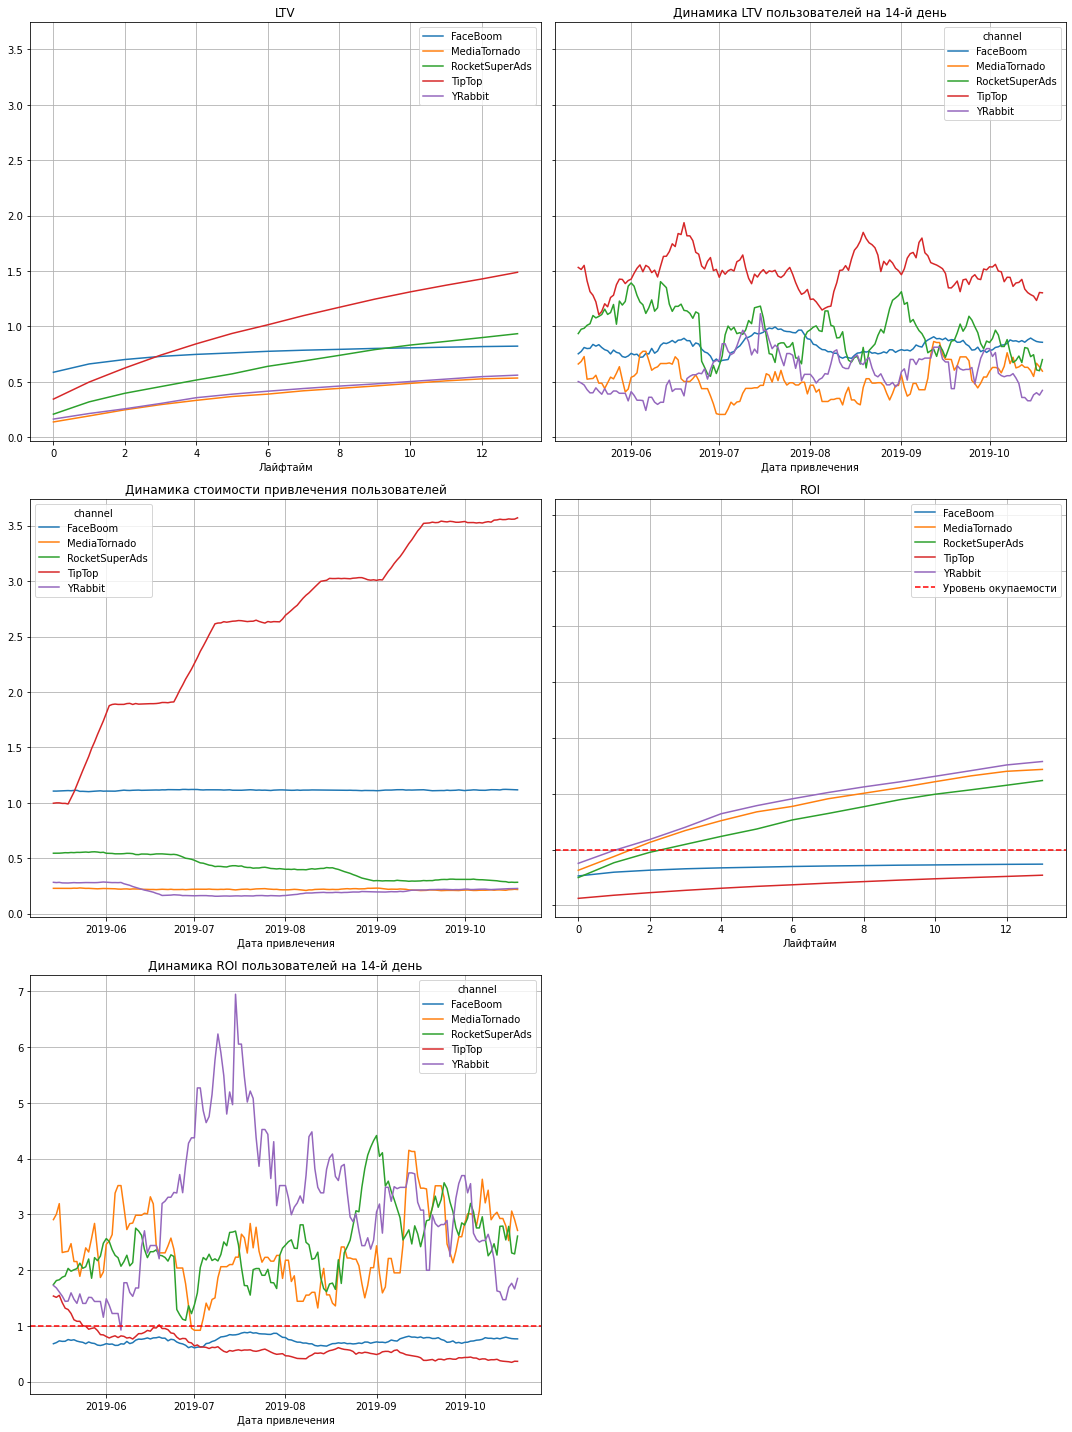

In [45]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Убыточны только те пользователи США, которые пришли в приложение из двух рекламных каналов,- TipTop и FaceBoom.

TipTop показывает самый высокий и стабильный в динамике LTV, но САС при этом постоянной растет: в итоге на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.

FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.

Эти два рекламных канала используются только для рынка США, поэтому оказались убыточны только вложения в рекламу США. 

***Рынок европейского региона***

Посмотрим на европейский рынок:

In [46]:
profiles_eur  = profiles.query('region != "United States"')

In [47]:
#считаем количество европейских пользователей в разбивке по рекламным каналам

profiles_eur.groupby('channel')['user_id'].count().reset_index()

,channel,user_id
0,AdNonSense,3880
1,LeapBob,8553
2,OppleCreativeMedia,8605
3,WahooNetBanner,8553
4,lambdaMediaAds,2149


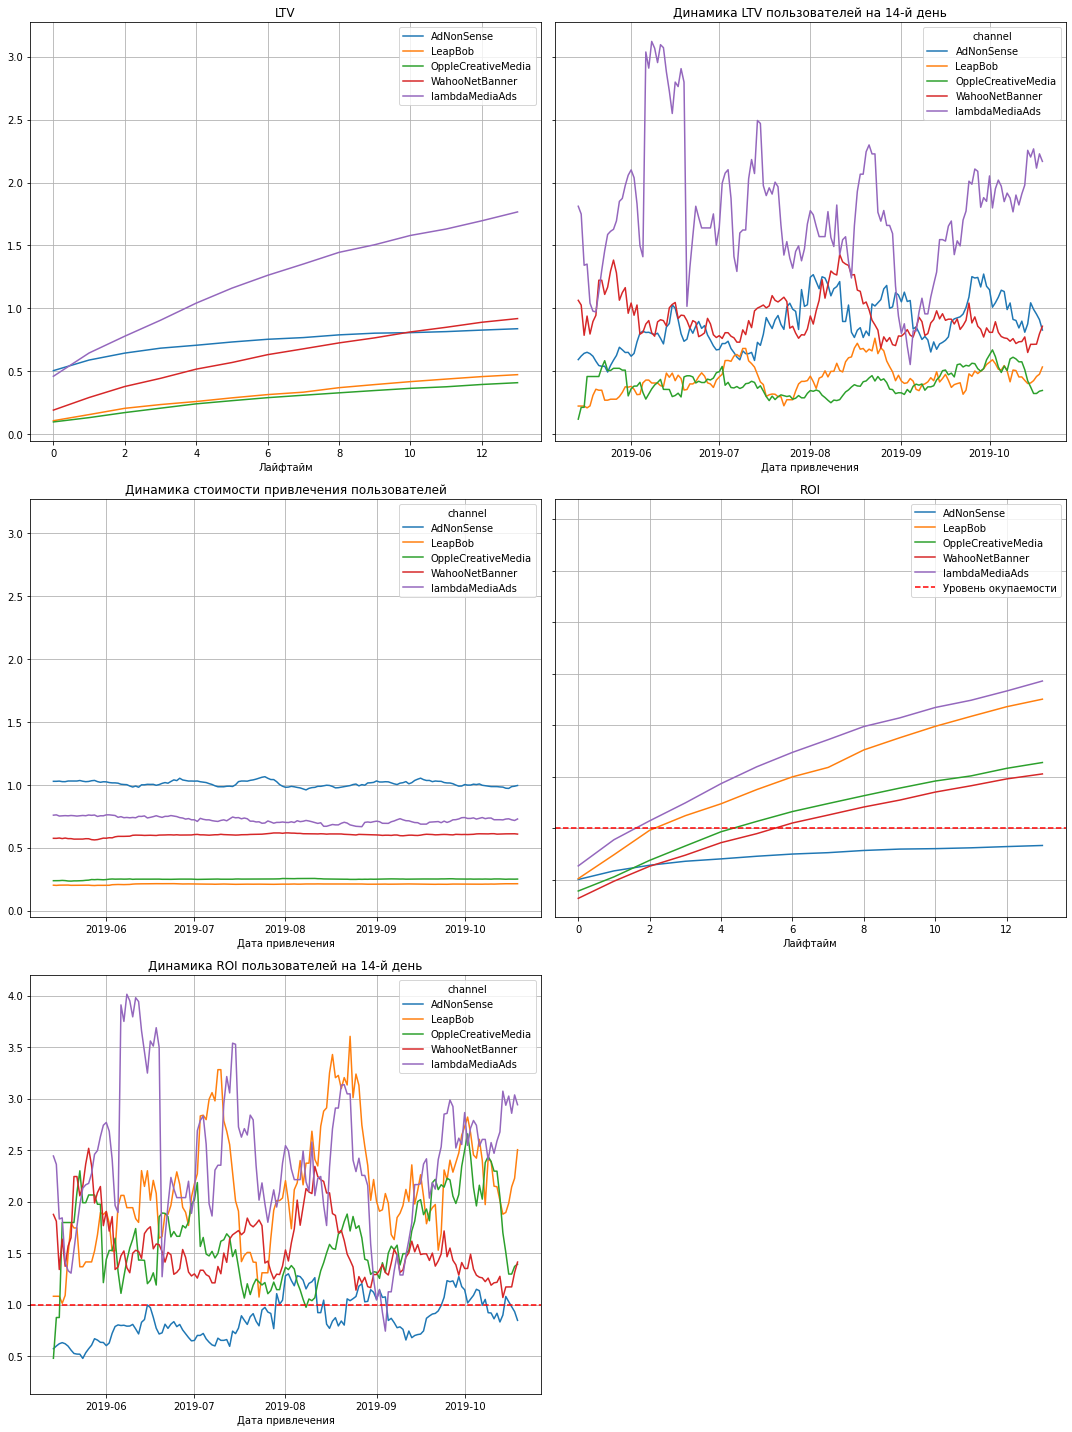

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eur, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

На европейском рынке видим аналогичную ситуацию с каналом AdNonSense: LTV (0.7 долл.), САС (1 долл.), ROI к концу второй недели- 70%.

Но есть и каналы с хорошей окупаемостью, уровня которой они достигают за 2 дня: LeapBob и lambdaMediaAds.

***Вывод:***

Убыточны только те пользователи США, которые пришли в приложение из двух рекламных каналов,- TipTop и FaceBoom.

TipTop показывает самый высокий и стабильный в динамике LTV, но САС при этом постоянной растет: в итоге на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.

FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.

Эти два рекламных канала используются только для рынка США, поэтому оказались убыточными только вложения в рекламу США. 


На европейском рынке видим аналогичную ситуацию с каналом AdNonSense: LTV (0.7 долл.), САС (1 долл.), ROI к концу второй недели- 70%. Но есть и каналы с хорошей окупаемостью, уровня которой они достигают за 2 дня: LeapBob и lambdaMediaAds.
      

### Расчет конверсии и удержания 

Для того, чтобы понять, чем могут быть вызваны проблемы окупаемости, изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам. Для этого вызовем функции get_conversion(), get_retention и визуализируем результаты с помощью функций plot_conversion() и plot_retention()

#### Конверсия и удержание с разбивкой по устройствам

Вызовем функции get_conversion() и plot_conversion():

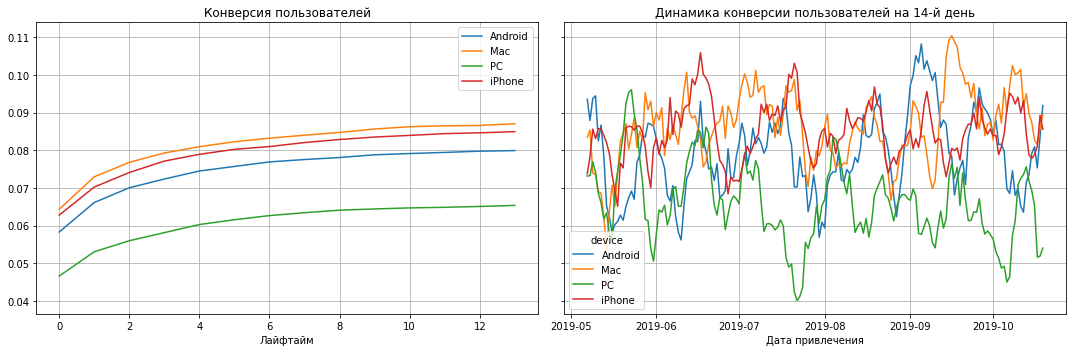

In [49]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В целом пользователи Mac, iPhone и Android конвертируются лучше PC, а также можно заметить "сезонные" провалы у всех устройств. Каких-либо особенностей у пользователей конкретного вида устройств не наблюдается.

Посмотрим на удержание. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель:

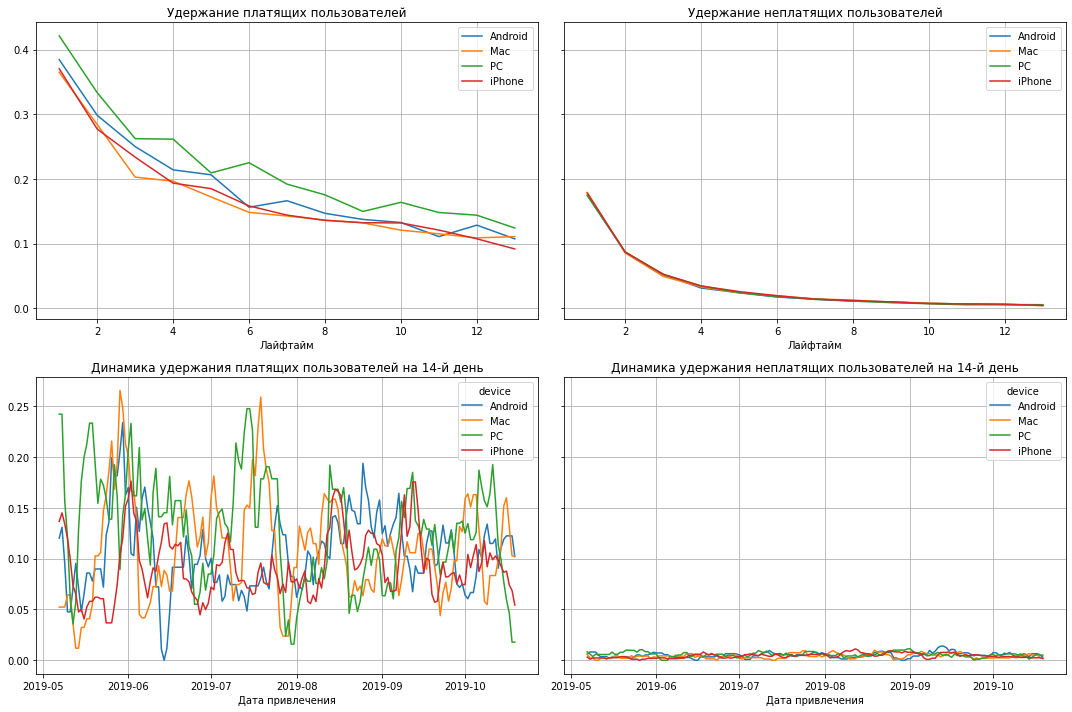

In [50]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание незначительно выше у пользователей PC, но в целом также нет каких-либо особенностей, которые бы указывали на то, что тип устройства может быть причиной низкой окупаемости.

***Вывод:***

В целом пользователи Mac, iPhone и Android конвертируются лучше PC, также можно заметить "сезонные" провалы у всех устройств. 
Удержание незначительно выше у пользователей PC, но в целом нет каких-либо особенностей, которые бы указывали на то, что тип устройства может быть причиной низкой окупаемости.

#### Конверсия и удержание с разбивкой по странам

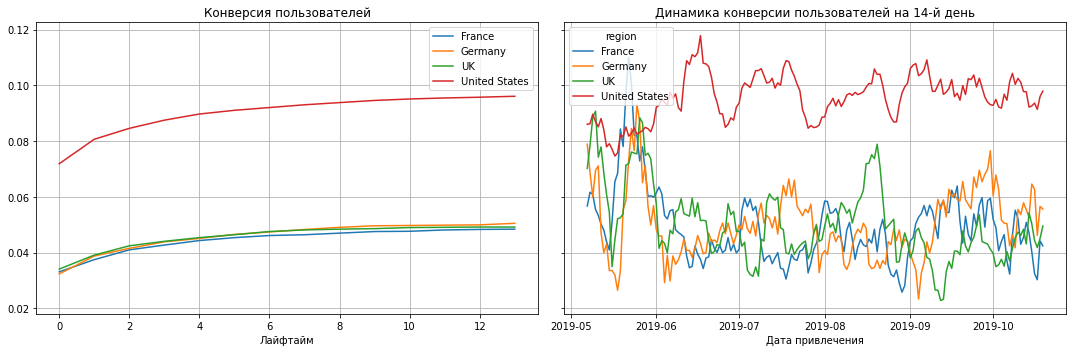

In [51]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, динамика конверсии на 14-й день также стабильна.

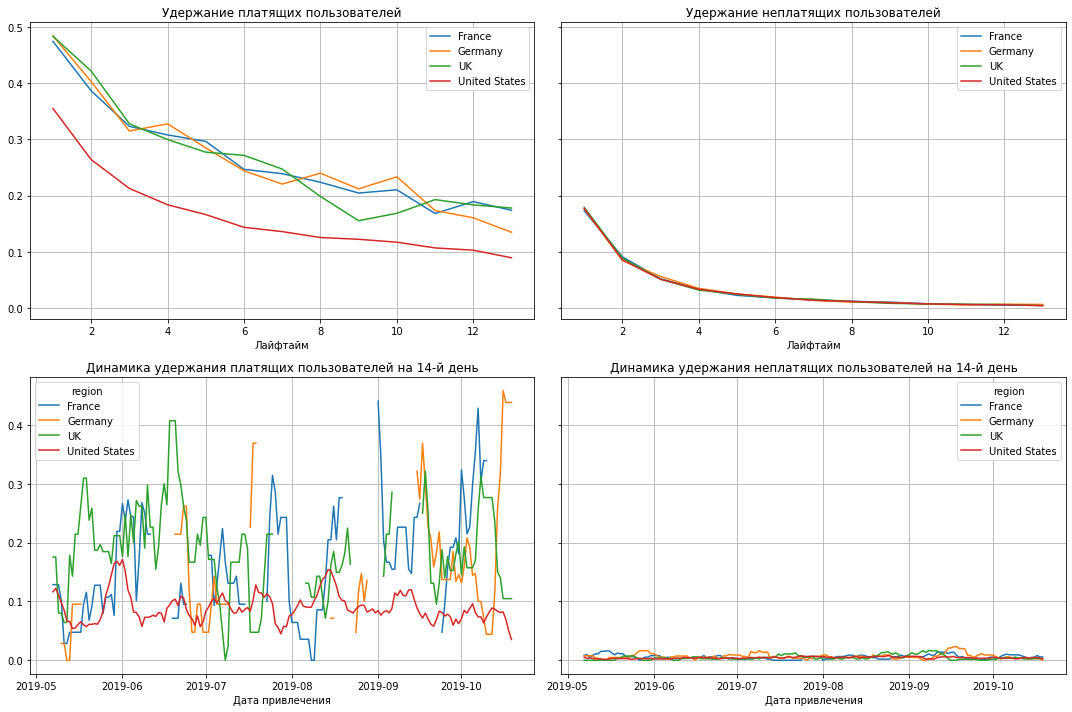

In [52]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот коэффициент удержания платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта. 

***Вывод:***

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта.

#### Конверсия и удержание с разбивкой по рекламным каналам

***Рынок США***

Поскольку проблемы с удержанием только у платящих пользователей из США , ограничим конверсию и удержание с разбивкой по рекламным каналам только профилями США (profiles_usa):

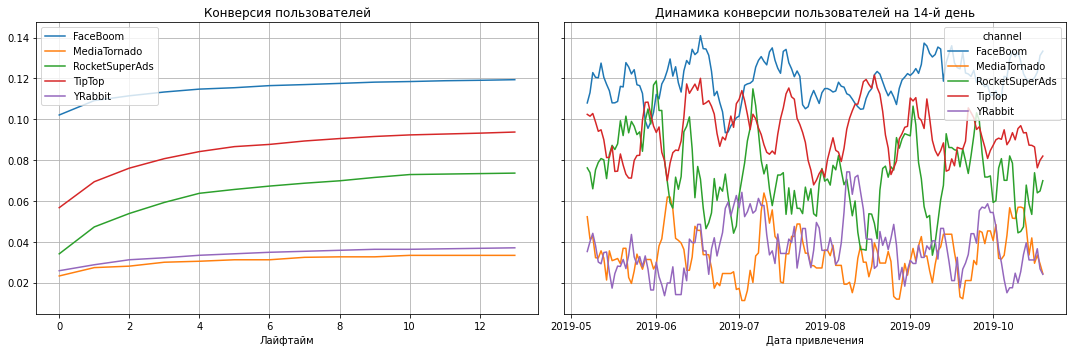

In [53]:
# смотрим конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия в США- у пользователей, которые пришли из FaceBoom и TipTop 

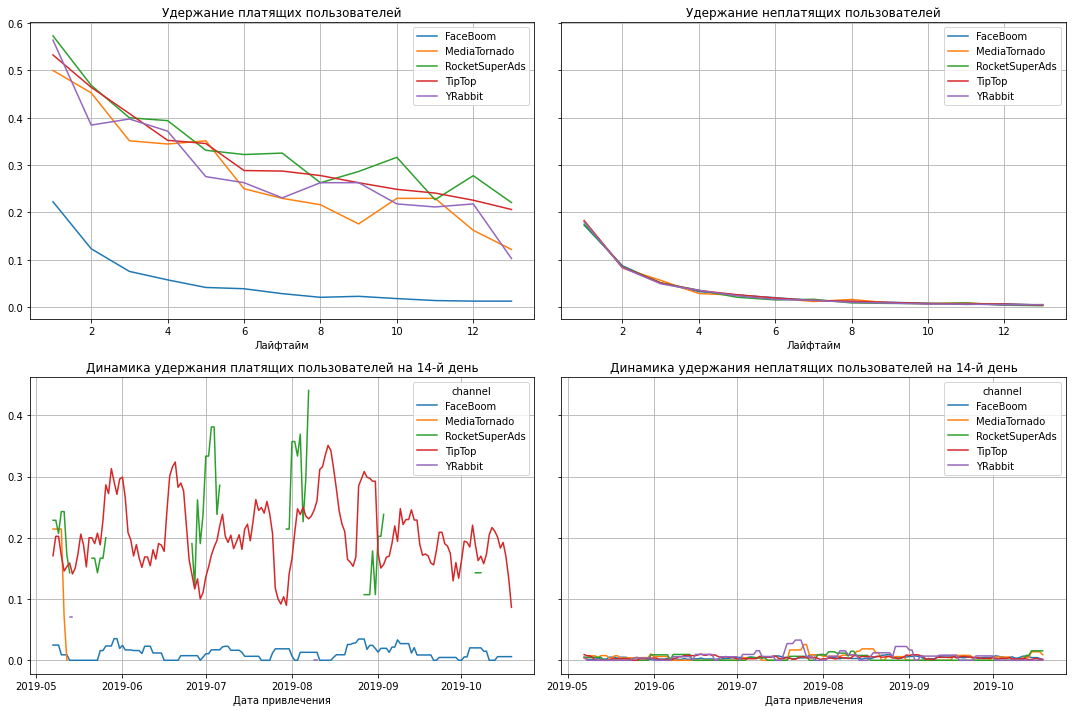

In [54]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самое низкое удержание платящих пользователей - у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%,  тогда как удержание у TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.

***Рынок европейских стран***

Дополнительно посмотрим европейский регион (profiles_eur):

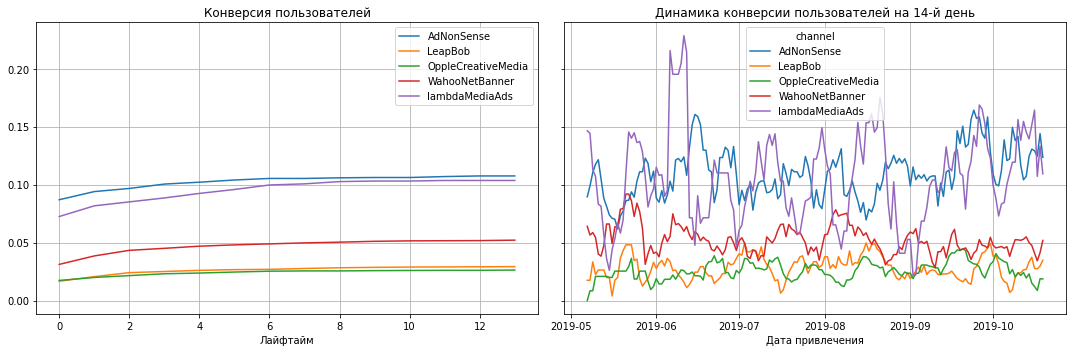

In [55]:
# смотрим конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eur, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия- у каналов AdNonSense и lambdaMediaAds, в общей динамике можно заметить их небольшой рост.

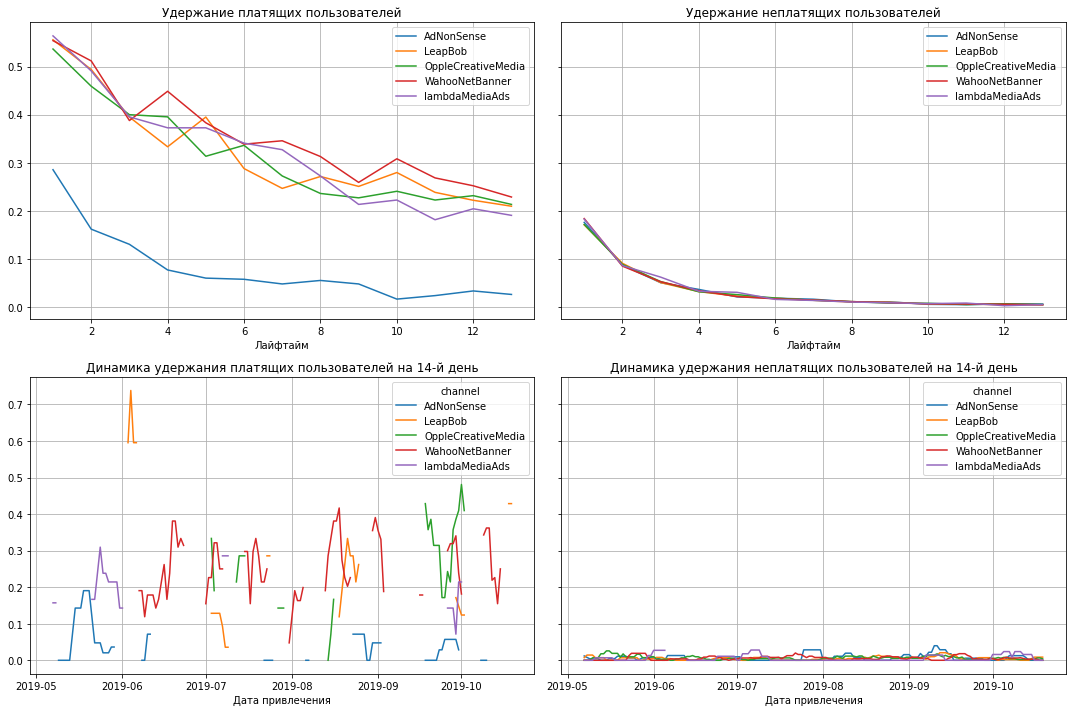

In [56]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eur, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Европейский канал AdNonSense показывает очень низкое по сравнению с остальными удержание платящих пользователей при уровне конверсии выше других. Остальные каналы идут примерно вровень друг с другом.

***Вывод:***

Самая высокая конверсия в США- у пользователей, которые пришли из FaceBoom и TipTop
Самое низкое удержание платящих пользователей - у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%, тогда как удержание у TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.

На европейском рынке самая высокая конверсия- у каналов AdNonSense и lambdaMediaAds, кроме всего прочего канал AdNonSense показывает очень низкое по сравнению с остальными удержание платящих пользователей. Остальные каналы идут примерно вровень друг с другом.

**Вывод по разделу 6**

При анализе данных мы видим проблему- динамика LTV условно-стабильна (уровень LTV к концу второй недели привлечения примерно одинаков на всем промежутке исследуемого периода), а динамика расходов по их привлечению (САС) постоянно растет, что повлекло за собой снижение окупаемости :к августу ROI окончательно опустился ниже предельного уровня (100%). Реклама не окупается к концу второй недели и дотягивает только до уровня 80%, что идет вразрез с бизнес-планом.

Стабильно не окупаются пользователи всех девайсов: порог окупаемости переходят только пользователи PC, но и то незначительно, и динамика их ROI также падает. На всех девайсах растет стоимость привлечения, самые "неокупаемые" при этом -владельцы устройств на IOS.

На графиках в разрезе стран ясно видно, как из общей картины выбиваются пользователи США: У них наибольший по сравнению с другими странами LTV, но и наибольшие, постоянно растущие при этом расходы на рекламу: в итоге на 1 доллар выручки с пользователя расходы на его привлечение составляют около 1,75 долл. В итоге США -единственная страна, у которой уровень окупаемости ниже допустимого порога в 100% : ROI в итоге упал почти до 50%.

С учетом того, что рынок США составляет 66% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю).

При детальном рассмотрении становится ясным, что быточны только те пользователи США, которые пришли в приложение из двух рекламных каналов,- TipTop и FaceBoom.

TipTop показывает самый высокий и стабильный в динамике LTV, но САС при этом постоянной растет: в итоге на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.

FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.

Эти два рекламных канала используются только для рынка США, поэтому оказались убыточны только вложения в рекламу США.

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта.
При этом самая высокая конверсия в США- у пользователей, которые пришли из FaceBoom и TipTop Самое низкое удержание платящих пользователей - у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%, тогда как удержание у TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.


На европейском рынке ситуация более оптимистична, низкое качество только у одного канала, который в целом не повлиял на окупаемость рекламы в европейском регионе: это  AdNonSense, ROI которого не превышает 70%, относительно высокая конверсия и очень низкое удержание. Стоит обратить внимание на lambdaMediaAds с высокой конверсией и средним для Европы уровнем удержания, и  2 дня: LeapBob с неплохой окупаемостью.

## Выводы и рекомендации

Представленные для анализа данные содержат информацию о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, сведениях об их покупках за этот период, а также статистика рекламных расходов. В результате предобработки данных исправлены нарушения стиля в наименовании столбцов и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. 


Для проведения анализа были сформированы 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте, за период привлечения с мая по октябрь 2019 г. включительно.

**Результаты анализа:**


Наибольшее число пользователей приложения - из США (66%), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей в общем количестве также выше в США: почти 7% против 4%(+/-) в остальных странах.

Больше всего пользователей заходят в приложение с iPhone (около 6 тыс.пользователей) против 3-5 тыс. пользователей других устройств, доля платящих находится на уровне 5-6.2% и максимальна у пользователей Mac.

В среднем на привлечение одного клиента в целом по проекту расходуется около 70 центов, а если исключить из этой массы долю "organic" и оставить только платные источники- 1.13 долл.на пользователя.

Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По доле пользователей, перешедших в категорию платящих, лидируют FaceBoom (12.2%), TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%).


Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл., средняя стоимость привлечения на пользователя по всему проекту- 1.13 долл. Основная доля расходов направлена на рекламные каналы TipTop (51.9%) и FaceBoom (30.75%). В динамике также можно увидеть рост направленных на эти же каналы (TipTop и FaceBoom) инвестиций в течение всего исследуемого периода, тогда как остальные каналы привлечения остаются постоянными, а уровень их гораздо ниже. Самые дорогие каналы привлечения - все те же TipTop (2.8 долл.на пользователя), FaceBoom (1.11 долл.), а также AdNonSense (1.0 долл.).

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта.
При детальном рассмотрении становится ясным, что убыточны только те пользователи США, которые пришли в приложение из двух рекламных каналов,- TipTop и FaceBoom:

- TipTop показывает самый высокий и стабильный в динамике LTV, но САС при этом постоянной растет: в итоге на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.

- FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.

Самое низкое удержание платящих пользователей - у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%, тогда как удержание у TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.


Эти два рекламных канала используются только для рынка США, поэтому оказались убыточны только вложения в рекламу США.
В итоге США -единственная страна, у которой уровень окупаемости ниже допустимого порога в 100% : ROI в итоге упал почти до 50%.

С учетом того, что рынок США составляет 66% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю).


Таким образом, причина убытков компании за представленный период - маркетинг, направленный на привлечение пользователей по двум каналам привлечения: TipTop и FaceBoom. Расходы, потраченные на рекламу в этих каналах значительно превышают выручку, которую приносят пришедшие в приложение пользователи: у FaceBoom при высоком уровне конверсии они быстро уходят, не успевая возместить потраченную на их привлечение сумму: у пользователей с FаceBoom очень плохое качество пользователей при больших объемах привлечения (они уходят не успев "отбить" сумму потраченных на них денег), а у пользователей TipTop все хорошо и с LTV, и с удержанием, но слишком высокие расходы на привлечение все равно не окупаются, и это влияет отрицательно на финансовый результат  компании.

Кроме того, стоит обратить на низкое качество европейского канала AdNonSense, который в целом не повлиял на окупаемость рекламы в европейском регионе но ROI которого не превышает 70% при высокой конверсии и очень низким удержанием. 


**Рекомендации:**

 - Проанализировать причину низкого уровня удержания пользователей США, пришедших из рекламных каналов FaceBoom и европейского AdNonSense: пользователи охотно приходят в приложение, делают покупку и не возвращаются. Следовательно, приложение не полностью соответствует их требованиям, либо не содержит то, что им нужно. Если планируется и далее осуществлять вложения в TipTop, FaceBoom и AdNonSense, необходимо более подробно изучить эту группу пользователей посредством налаживания обратной связи, чтобы в будущем персонализировать предложения, целенаправленно информировать клиента о продукции, скидках, бонусах, модифицировать программы лояльности.
 
 - Оценить экономическую целесообразность высокой цены привлечения пользователей через канал TipTop: при условии, что пользователи, пришедшие из TipTop, хорошего качества (высокий LTV, хорошая конверсия и удержание), расходы не окупаются.
 
 - В целях повышения эффективности вложений обратить внимание на прочие рекламные каналы с хорошей окупаемостью:
        
        
    - В США это YRabbit, MediaTornado и RocketSuperAds. При этом у RocketSuperAds наибольшая из них доля конверсии в             платящих пользователей.
 
     - В европейском регионе перспективным может оказаться lambdaMediaAds с высокой конверсией и средним для Европы               уровнем удержания и LeapBob с неплохой окупаемостью.


